In [2]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

In [6]:
model = YOLO("yolov8m.pt")

100%|██████████████████████████████████████| 49.7M/49.7M [00:14<00:00, 3.57MB/s]


In [8]:
results = model.predict("cat_dog.jpg")


image 1/1 /home/aarsh/cat_dog.jpg: 448x640 1 cat, 1 dog, 338.1ms
Speed: 1.8ms preprocess, 338.1ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


In [10]:
results = results[0]

In [12]:
print(results)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [14]:
len(results.boxes)

2

In [18]:
box = results.boxes[0]

In [20]:
print(box)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.])
conf: tensor([0.9450])
data: tensor([[261.0996,  94.0881, 460.9550, 313.6855,   0.9450,  16.0000]])
id: None
is_track: False
orig_shape: (415, 612)
shape: torch.Size([1, 6])
xywh: tensor([[361.0273, 203.8868, 199.8554, 219.5974]])
xywhn: tensor([[0.5899, 0.4913, 0.3266, 0.5292]])
xyxy: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
xyxyn: tensor([[0.4266, 0.2267, 0.7532, 0.7559]])


In [22]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([16.])
Coordinates: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
Probability: tensor([0.9450])


In [24]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 16.0
Coordinates: [261.099609375, 94.0881118774414, 460.95501708984375, 313.685546875]
Probability: 0.9449876546859741


In [28]:
for box in results.boxes:
  class_id = results.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


In [30]:
from PIL import Image

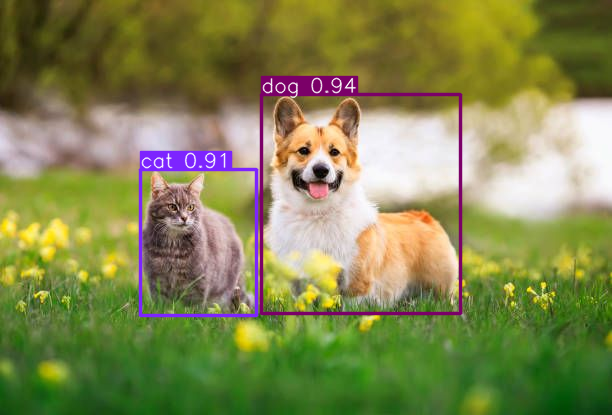

In [34]:
Image.fromarray(results.plot()[:,:,::-1])

In [36]:
results = model.predict("RobsonStreet.jpg")


image 1/1 /home/aarsh/RobsonStreet.jpg: 448x640 15 persons, 5 cars, 2 traffic lights, 358.5ms
Speed: 1.8ms preprocess, 358.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


In [44]:
len(results[0])
results = results[0]

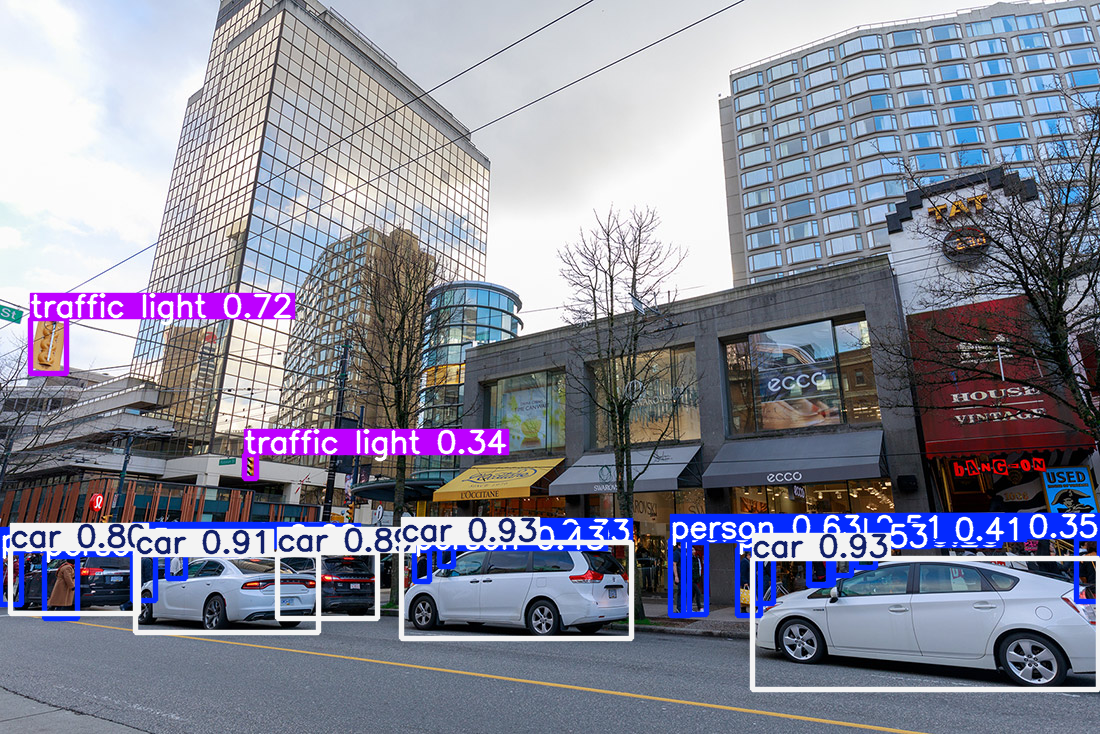

In [46]:
Image.fromarray(results.plot()[:,:,::-1])